# Data Science II: Assignment 1
## Performance Assessment Task (PAT) 2

In [1]:
%cd C:\Users\Andra\Documents\michener dhda\120 data science ii\Assignment 1

C:\Users\Andra\Documents\michener dhda\120 data science ii\Assignment 1


In [2]:
%pwd

'C:\\Users\\Andra\\Documents\\michener dhda\\120 data science ii\\Assignment 1'

In [3]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sb

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from scipy import stats

In [4]:
# To show the whole data set:
# pd.set_option("display.max.columns", None)
# pd.set_option("display.max.rows", None)

# To reset otherwise it always shows the whole data set
# pd.reset_option('all')

In [5]:
xtrfxcovbs = pd.read_sas("xtrfxcovbs.sas7bdat",format='sas7bdat')
xtrfxcovbs

,Replicate,t_XTRDate,r_XTRDate,NoNewOsteoFx_EndDate,NoNewhipFx_EndDate,QID,t_FL_FEA,t_CtPo_EC,t_TtAr,t_CtAr,...,age_at_menop,meno_status,liver_ever,STATUS,r_TTOP,t_TTOP,r_TTHip,t_TTHip,NumberHits,ID
0,1.0,2012-04-03,2012-04-03,2014-03-11 00:00:00,2014-03-11 00:00:00,b'CA01519',4901.9,8.8300,960.47070,72.70221,...,53.0,2.0,0.0,0.0,23.0,23.0,23.0,23.0,2.0,891.0
1,1.0,2012-04-03,2012-04-03,2014-03-11 00:00:00,2014-03-11 00:00:00,b'CA01519',4901.9,8.8300,960.47070,72.70221,...,53.0,2.0,0.0,0.0,23.0,23.0,23.0,23.0,2.0,892.0
2,1.0,2012-03-13,2012-03-13,2015-01-27 00:00:00,2015-01-27 00:00:00,b'CA01545',6204.0,9.5600,701.02992,99.59033,...,32.0,3.0,0.0,0.0,34.0,34.0,34.0,34.0,1.0,893.0
3,1.0,2012-03-21,2012-03-21,2015-01-26 00:00:00,2015-01-26 00:00:00,b'CA01590',5529.5,10.2100,689.24115,104.05397,...,32.0,3.0,0.0,0.0,34.0,34.0,34.0,34.0,1.0,894.0
4,1.0,2012-10-18,2012-10-18,2015-03-29 00:00:00,2015-03-29 00:00:00,b'CA01620',5638.3,6.3200,588.60634,109.83789,...,55.0,3.0,0.0,0.0,29.0,29.0,29.0,29.0,3.0,895.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,1.0,2012-11-22,2012-11-22,2014-06-27 00:00:00,2014-06-27 00:00:00,b'VR02755',5465.0,0.1475,651.50000,92.40000,...,63.0,3.0,0.0,2.0,19.0,19.0,19.0,19.0,4.0,1421.0
1227,1.0,2012-11-22,2012-11-22,2014-06-27 00:00:00,2014-06-27 00:00:00,b'VR02755',5465.0,0.1475,651.50000,92.40000,...,63.0,3.0,0.0,2.0,19.0,19.0,19.0,19.0,4.0,1422.0
1228,1.0,2012-11-22,2012-11-22,2014-06-27 00:00:00,2014-06-27 00:00:00,b'VR02755',5465.0,0.1475,651.50000,92.40000,...,63.0,3.0,0.0,2.0,19.0,19.0,19.0,19.0,4.0,1423.0
1229,1.0,2012-11-22,2012-11-22,2014-06-27 00:00:00,2014-06-27 00:00:00,b'VR02755',5465.0,0.1475,651.50000,92.40000,...,63.0,3.0,0.0,2.0,19.0,19.0,19.0,19.0,4.0,1424.0


Convert variables to lower case

In [6]:
xtrfxcovbs.columns = xtrfxcovbs.columns.str.lower()
xtrfxcovbs.columns

Index(['replicate', 't_xtrdate', 'r_xtrdate', 'nonewosteofx_enddate',
       'nonewhipfx_enddate', 'qid', 't_fl_fea', 't_ctpo_ec', 't_ttar',
       't_ctar', 't_tbar', 't_ttbmd', 't_ctbmd', 't_ctth', 't_tbbmd', 't_tbn',
       't_tbth', 't_tbsp', 't_moart', 'r_fl_fea', 'r_ctpo_ec', 'r_ttar',
       'r_ctar', 'r_tbar', 'r_ttbmd', 'r_ctbmd', 'r_ctth', 'r_tbbmd', 'r_tbn',
       'r_tbth', 'r_tbsp', 'r_moart', 't_bvtv', 'r_bvtv', 'fnewopfxd',
       'fnewhipfxd', 'newosteofx', 'firstnewosteofx_site',
       'firstnewosteofx_year', 'firstnewosteofx_month', 'firstnewosteofx_day',
       'newosteofx_trauma', 'newhipfx', 'firstnewhipfx_year',
       'firstnewhipfx_month', 'firstnewhipfx_day', 'newhipfx_trauma',
       'nonewosteofx_enddispo', 'nonewhipfx_enddispo', 'age', 'height',
       'weight', 'centre', 'parenthipfx', 'prevfx_any', 'cig_cur',
       'nbalc_week', 'rheu_ever', 'cortico_oral_reg', 'secop', 'nbfall_pastyr',
       'everlost10lbs', 'osteomed', 'i', 'prev_backmt', 'prev_hipmt'

### Questions 1 <br>
In the dataset xtrfxcovbs.sas7bdat, there is a variable named type1diabetes_ever. This variable indicates whether an individual has ever been diagnosed with diabetes. Which is the most likely distribution that this variable follows? 

__a.	Binomial__ <br>
b.	Categorical <br>
c.	Ordinal <br>
d.	Interval <br>
e.	Continuous <br>


_Answer: A. Binomial_

In [7]:
pd.crosstab(index=xtrfxcovbs['type1diabetes_ever'], columns='freq')

col_0,freq
type1diabetes_ever,
0.0,1215
1.0,15


### Question 2
In the dataset xtrfxcovbs.sas7bdat, there is a variable named nbalc_week. This variable indicates the number of alcoholic beverages an individual consumes per week. Which is the most likely distribution that this variable follows?

a.	Binomial  <br>
b.	Categorical <br>
c.	Ordinal <br>
d.	Interval <br>
__e.	Continuous__ <br>


_Answer: e.The way it's coded it seems continuous based on the decimal places. 

In [8]:
pd.crosstab(index=xtrfxcovbs['nbalc_week'], columns='freq')

col_0,freq
nbalc_week,
0.000000,375
0.230769,126
0.461538,66
0.692308,32
0.923077,5
1.000000,119
1.153846,4
1.384615,2
2.000000,93


In [9]:
(np.isnan(xtrfxcovbs['nbalc_week'])).value_counts()

False    1230
True        1
Name: nbalc_week, dtype: int64

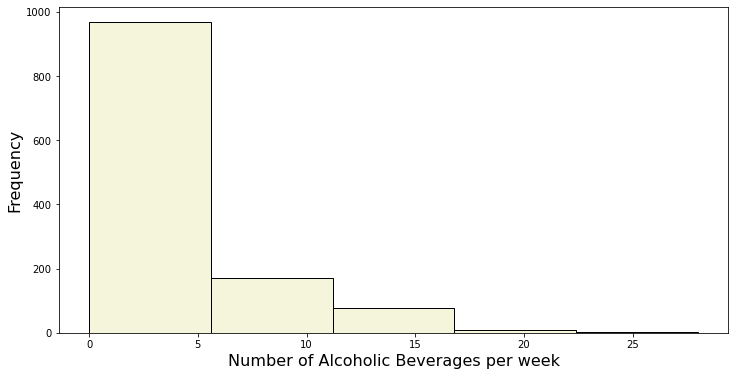

In [10]:
plt.figure(figsize=(12,6))
#plt.title("Title",fontsize=20)
plt.hist(data=xtrfxcovbs, x='nbalc_week',edgecolor="k", color="beige", bins=5)
plt.xlabel ('Number of Alcoholic Beverages per week', fontsize=16)
plt.ylabel ('Frequency', fontsize=16)
plt.show()

### Question 3
In the dataset xtrfxcovbs.sas7bdat, there is a variable named CENTRE. This variable indicates the study centre that participants visited to have their data collected. Sites were labelled Centre 1 to 5. Which is the most likely distribution that this variable follows? 

a.	Binomial <br>
__b.	Categorical__ <br>
c.	Ordinal <br>
d.	Interval <br>
e.	Continuous <br>


_Answer: b.Categorical_

In [11]:
xtrfxcovbs['centre']
#pd.crosstab(index=xtrfxcovbs['centre'], columns='freq')

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1226    5.0
1227    5.0
1228    5.0
1229    5.0
1230    5.0
Name: centre, Length: 1231, dtype: float64

### PART 2
For Questions 4–5, read the following scenarios and determine which statistical test is most appropriate. You do not need to conduct any statistical tests for Questions 4 and 5. Make sure to look up the distribution properties of the exposure and outcome along “The Stats Table”.

### Question 4
In the dataset xtrfxcovbs.sas7bdat, we obtained information on the exposure variable, current smoking status (cig_cur; yes/no), and the outcome variable, previous fractures (prevfx_any; yes/no). If we wanted to compare whether there was a difference in experiencing a previous fracture based on smoking status, which statistical test would we use? 

_Answer Fisher’s test OR Chi-square test (depending on the cell frequencies)_

### Question 5

In the dataset xtrfxcovbs.sas7bdat, we obtained information on the exposure variable, experiencing a new fracture (newosteofx; yes/no), and the outcome variable, trabecular bone thickness of the radius (r_TbTh) which is measured in millimetres. Assume the outcome variable is Normally distributed If we wanted to compare the mean trabecular bone thickness of the radius based on whether an individual experienced a new fracture, which statistical test would we use? 

_Answer: Independent samples (unpaired) t-test_

In [12]:
q4 = xtrfxcovbs[["cig_cur","prevfx_any"]].dropna()

In [13]:
q4freq = pd.crosstab(q4['cig_cur'], q4['prevfx_any'])
q4freq

prevfx_any,0.0,1.0
cig_cur,,
0.0,746,443
1.0,20,21


### Question 6

We hypothesize that 5% of individuals in the general population have untreated hyperthyroidism. In the dataset xtrfxcovbs.sas7bdat, we obtained information on untreated hyperthyroidism (untreat_hyperthyr_ever; yes/no). Test whether the proportion of individuals with untreated hyperthyroidism in the sample dataset significantly differs from 5% (i.e., the hypothesized value). Please report the following information in your answer: 

__i. The statistical test used__

_Answer: chi-square test_

In [14]:
#clean up the data
xtrfxhyperthy = xtrfxcovbs[["untreat_hyperthyr_ever"]].dropna()

In [15]:
# first create a frequency:
q6 = pd.crosstab(xtrfxhyperthy['untreat_hyperthyr_ever'], 1)
q6

col_0,1
untreat_hyperthyr_ever,
0.0,1222
1.0,8


In [16]:
# take column 2 to generate an array that just looks like [1110, 120]
q6[1]

untreat_hyperthyr_ever
0.0    1222
1.0       8
Name: 1, dtype: int64

In [17]:
# Convert proportions to absolute numbers by multiplying proportions with sample size 
ss = xtrfxhyperthy['untreat_hyperthyr_ever'].size

# this is applied in: 
# f_exp=ss*np.array([0.90, 0.10])  # vector scalar multiplication
ss

1230

In [18]:
q6chi2, q6chi2pval = stats.chisquare(q6[1], f_exp=ss*np.array([0.95,0.05]), axis=None)
print("Chisquare test of specified proportions: Chi2 = ", q6chi2,
"; p-value = ", q6chi2pval)

Chisquare test of specified proportions: Chi2 =  48.99015832263586 ; p-value =  2.572500381754843e-12


__ii.	The proportion of individuals in the dataset with untreated hyperthyroidism__

In [19]:
proportion = 8/1230*100
proportion

0.6504065040650406

__iii. Whether the proportion of individuals in the dataset with untreated hyperthyroidism was greater or less than the hypothesized value__

_Answer: the proportion is less_

__iv.	Interpret the results and level of significance (i.e., whether the results were statistically significant or not)__

_Answer: Because the p-value = <0.0001 the proportion of the population with untreated hyperthyroidism is significantly different than the hypothesis that 5% of individuals in the general population have untreated hyperthyroidism._

### Question 7

In the dataset xtrfxcovbs.sas7bdat, assume age is a Normally distributed outcome variable. Test whether the mean age (age, years) differs across the five different study centres (CENTRE; Centre 1, 2, 3, 4, or 5). Please report the following information in your answer:

__i.	The statistical test used__

_Answer: One Way Anova_

In [20]:
# Check distribution of exposure: 
xtrfxcovbs['age'].value_counts()

74.0    75
79.0    74
77.0    64
75.0    61
81.0    58
63.0    51
82.0    51
66.0    50
80.0    47
65.0    46
78.0    46
71.0    46
72.0    45
68.0    44
70.0    44
76.0    41
73.0    41
64.0    41
83.0    40
67.0    39
62.0    38
69.0    37
84.0    29
85.0    29
60.0    17
86.0    14
61.0     9
58.0     7
87.0     6
59.0     6
47.0     6
54.0     5
48.0     5
56.0     4
91.0     4
40.0     2
53.0     2
50.0     2
89.0     1
51.0     1
42.0     1
52.0     1
Name: age, dtype: int64

In [21]:
#Need to figure segment out outcome values (age) for each exposure group:

# centre = 1: 
age1 = xtrfxcovbs['age'][xtrfxcovbs['centre']==1].dropna()
# centre = 2: 
age2 = xtrfxcovbs['age'][xtrfxcovbs['centre']==2].dropna()
# centres = 3: 
age3 = xtrfxcovbs['age'][xtrfxcovbs['centre']==3].dropna()
# centre = 4: 
age4 = xtrfxcovbs['age'][xtrfxcovbs['centre']==4].dropna()
# centre = 5: 
age5 = xtrfxcovbs['age'][xtrfxcovbs['centre']==5].dropna()

In [22]:
stats.f_oneway(age1, age2, age3, age4, age5)

F_onewayResult(statistic=18.98996169713232, pvalue=3.648577854148935e-15)

__ii.	The mean age of each of the five study centres__

In [23]:
q7mean = xtrfxcovbs[['centre','age']]

In [24]:
q7mean.groupby('centre').describe().round(0).T

centre       1.0    2.0    3.0    4.0    5.0
age count  352.0  200.0  161.0  292.0  225.0
    mean    74.0   74.0   75.0   70.0   73.0
    std      6.0    8.0    7.0   10.0    7.0
    min     60.0   58.0   60.0   40.0   61.0
    25%     69.0   68.0   70.0   63.0   67.0
    50%     74.0   76.0   75.0   70.0   73.0
    75%     79.0   80.0   80.0   77.0   79.0
    max     86.0   89.0   87.0   91.0   85.0

__iii.	Interpret the results and level of significance (i.e., whether the results were statistically significant or not)__

_Answer: Because the p-value is <0.001 the age differes significantly across the different centres_

### Question 8

In the dataset xtrfxcovbs.sas7bdat, assume weight is a non-Normally distributed outcome variable. Test whether the mean weight (weight, kilograms) differs across the five different study centres (CENTRE; Centre 1, 2, 3, 4, or 5). Please report the following information in your answer:  

__i.	The statistical test used__

_Answer: Kruskal Wallis test_

In [27]:
weight1 = xtrfxcovbs['weight'][xtrfxcovbs['centre']==1].dropna()
weight2 = xtrfxcovbs['weight'][xtrfxcovbs['centre']==2].dropna()
weight3 = xtrfxcovbs['weight'][xtrfxcovbs['centre']==3].dropna()
weight4 = xtrfxcovbs['weight'][xtrfxcovbs['centre']==4].dropna()
weight5 = xtrfxcovbs['weight'][xtrfxcovbs['centre']==5].dropna()

In [28]:
q8 = stats.kruskal(weight1, weight2, weight3, weight4, weight5)
q8

KruskalResult(statistic=14.57073544277422, pvalue=0.005679587412680891)

__ii.	Interpret the results and level of significance (i.e., whether the results were statistically significant or not)__

_Answer: Because the p-Value is < 0.05 the difference is statistically significant_

### Question 9

In the dataset xtrfxcovbs.sas7bdat, there are trabecular bone microarchitectural measures for both the radius and tibia obtained from the same individuals. For example, each individual in the dataset has a measure of trabecular bone separation for their radius (r_TbSp, millimetres) and tibia (t_TbSp, millimetres). Assume both variables are Normally distributed and dependent. Compare whether the mean trabecular bone separation of the radius differs from the mean trabecular bone separation of the tibia. Please report the following information in your answer: 

__i.	The statistical test used__

_Answer: paired t-test_

In [29]:
#clean up the data
q9 = xtrfxcovbs[["r_tbsp","t_tbsp"]].dropna()

In [30]:
q9ttest = stats.ttest_rel(q9['r_tbsp'], q9['t_tbsp'], nan_policy='propagate', alternative='two-sided')
q9ttest

Ttest_relResult(statistic=2.8585123206965517, pvalue=0.004331416508262454)

__ii.	Interpret the results and level of significance (i.e., whether the results were statistically significant or not)__ 

_Answer: The two are statistically significantly different_

### Question 10

In the dataset xtrfxcovbs.sas7bdat, we obtained information on the exposure variable, experiencing a new fracture (newosteofx; yes/no) and the outcome variable, use of oral corticosteroids (cortico_oral_reg; yes/no). Compare whether there is a difference in use of oral corticosteroids based on experiencing a new fracture. Hint: Remember to check the cell frequencies. Please report the following information in your answer: 

__i.	The statistical test used__

_Answer: Fisher's Exact test_

In [27]:
q10 = xtrfxcovbs[["cortico_oral_reg","newosteofx"]].dropna()

In [28]:
q10freq = pd.crosstab(q10['cortico_oral_reg'], q10['newosteofx'])
q10freq

newosteofx,0.0,1.0
cortico_oral_reg,,
0.0,1051,116
1.0,59,4


In [29]:
oddsr, p = stats.fisher_exact(q10freq, alternative='two-sided')
print("Fisher exact test p-vaue = ", p,
"; with odds ratio = ", oddsr, "for a two-sided test.")

Fisher exact test p-vaue =  0.5111053024080378 ; with odds ratio =  0.614260666277031 for a two-sided test.


__ii.	Interpret the results and level of significance (i.e., whether the results were statistically significant or not)__

_Answer: The use of oral corticosteroids does not affect new fractures. (You are not more or less likely to have a new fracture if you are on oral corticosteroids._